In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [185]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [186]:
df.shape

(962, 2)

In [187]:
df['Category'].value_counts()
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

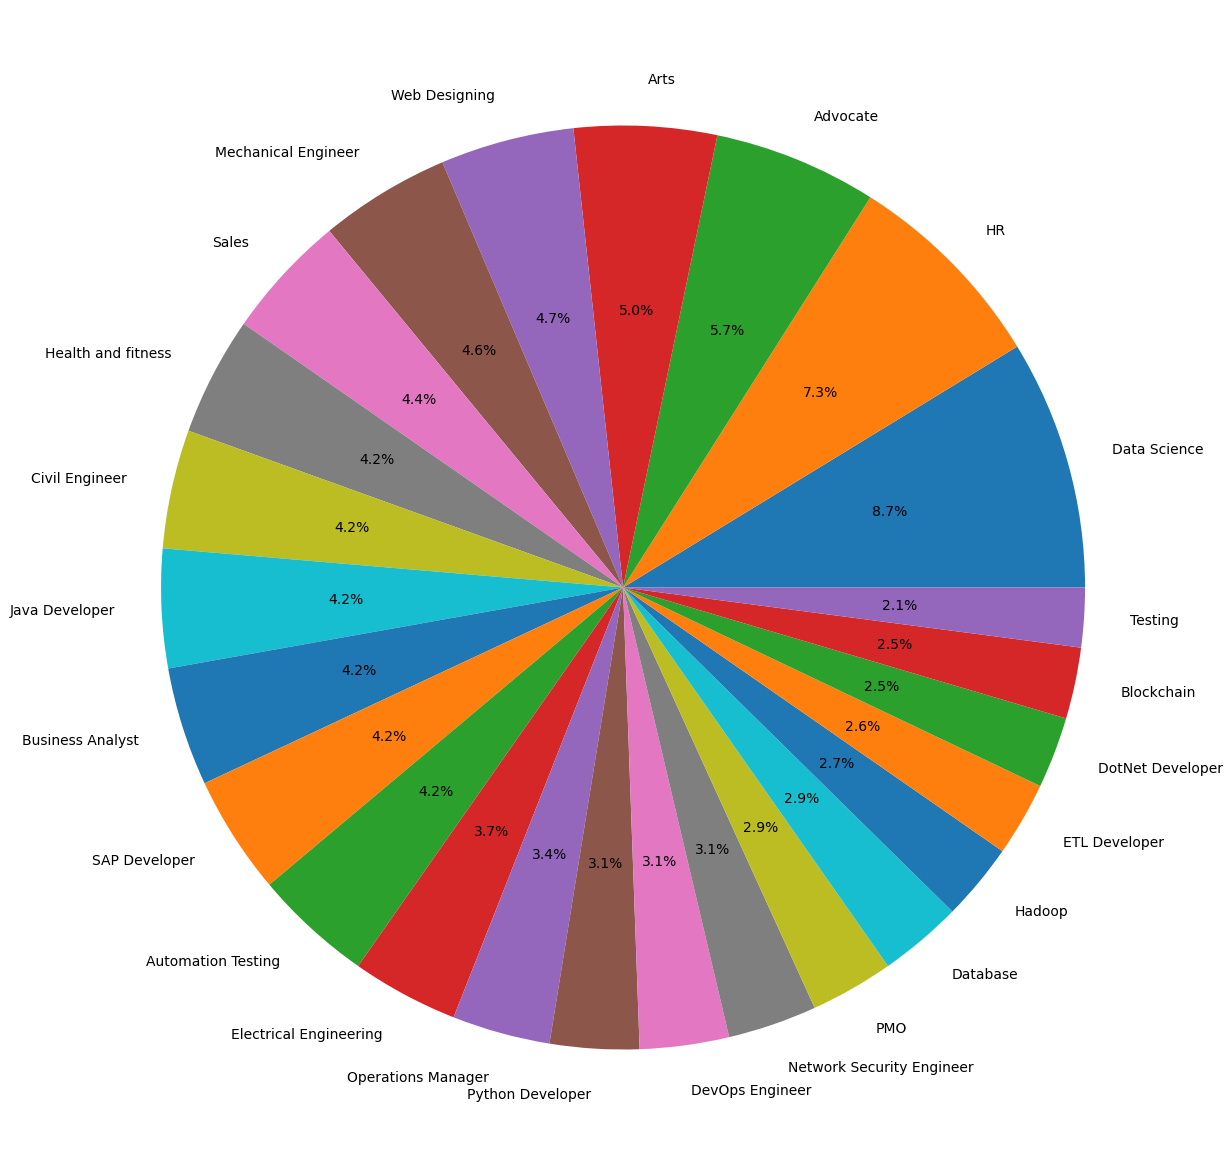

In [188]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [189]:
import re
def cleanResume(txt):
    cleantxt=re.sub('http\S+\s',' ',txt)
    cleantxt=re.sub('@\S+',' ',cleantxt)
    cleantxt=re.sub('#\S+\s',' ',cleantxt)
    cleantxt=re.sub('[%s]' % re.escape("""!"#$%&'(*+,-./:;<=>?@[\]^_`{|})~"""),' ',cleantxt)
    cleantxt=re.sub(r'[^\x00-\x7f]',' ',cleantxt)
    cleantxt=re.sub('\s+',' ',cleantxt)
    return cleantxt

In [190]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [191]:
df['Resume'][5]

'SKILLS C Basics IOT Python MATLAB Data Science Machine Learning HTML Microsoft Word Microsoft Excel Microsoft Powerpoint RECOGNITION Academic Secured First place in B Tech Education Details August 2014 to May 2018 B Tech Ghatkesar Andhra Pradesh Aurora s Scientific and Technological Institute June 2012 to May 2014 Secondary Education Warangal Telangana SR Junior College Data Science Skill Details MS OFFICE Exprience Less than 1 year months C Exprience Less than 1 year months machine learning Exprience Less than 1 year months data science Exprience Less than 1 year months Matlab Exprience Less than 1 year monthsCompany Details company description '

In [192]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [193]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [194]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [195]:
df.Category.unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [196]:
#'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#       'Mechanical Engineer', 'Sales', 'Health and fitness',
 #      'Civil Engineer', 'Java Developer', 'Business Analyst',
#       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#       'Operations Manager', 'Python Developer', 'DevOps Engineer',
#       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
 #      'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext=tfidf.transform(df['Resume'])

In [198]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(requiredtext, df['Category'],test_size=0.2,random_state=42)

In [201]:
X_train.shape

(769, 7347)

In [202]:
X_test.shape

(193, 7347)

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score


clf=OneVsRestClassifier(KNeighborsClassifier())
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(ypred)
print(accuracy_score(y_test,ypred))

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
0.9844559585492227


In [206]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [212]:
myresume="""devops"""

In [213]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: DevOps Engineer
8
